Lab Experiment 2:
Analyze a dataset containing housing
price and attributes like area, number of bedrooms, furnishing status etc.
Generate appropriate visualizations to explore the association between various
attributes. 
Plot the correlation between all numerical variables.
What can be inferred?

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

2.Handling Missing Values

In [9]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
#outlier detection using box plots or through z-score /IQR methods

In [12]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<Axes: xlabel='price'>

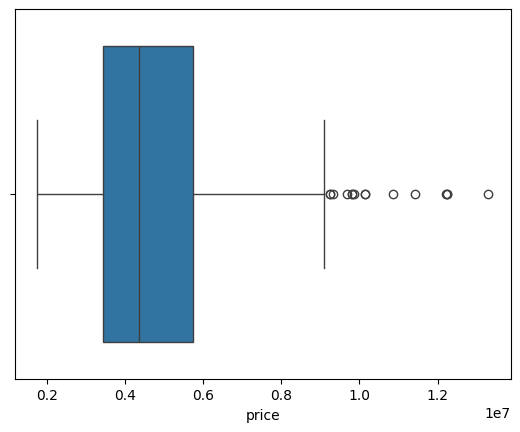

In [13]:
import seaborn as sns
sns.boxplot(x='price',data=df)

3.Univariate Analysis

Numerical variables:

Histograms or KDE plots to check distribution.

<Axes: xlabel='price', ylabel='Count'>

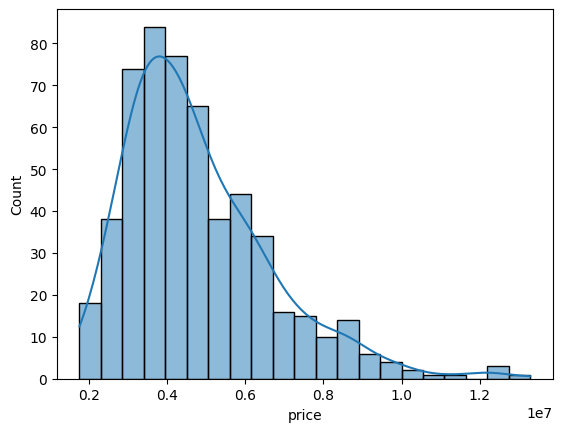

In [15]:

sns.histplot(df['price'], kde=True)


Categorical variables:

Bar plots for counts per category.

<Axes: xlabel='furnishingstatus', ylabel='count'>

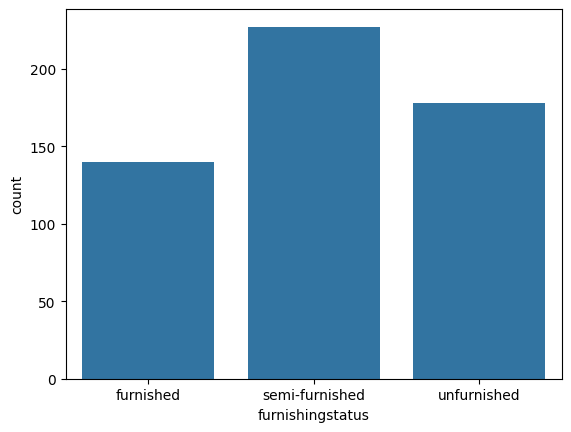

In [16]:
sns.countplot(x='furnishingstatus', data=df)


4.Bivariate Analysis

Numerical vs Numerical:

Scatter plots or pairplots to explore relationships.

Compute correlation matrices.

<Axes: xlabel='area', ylabel='price'>

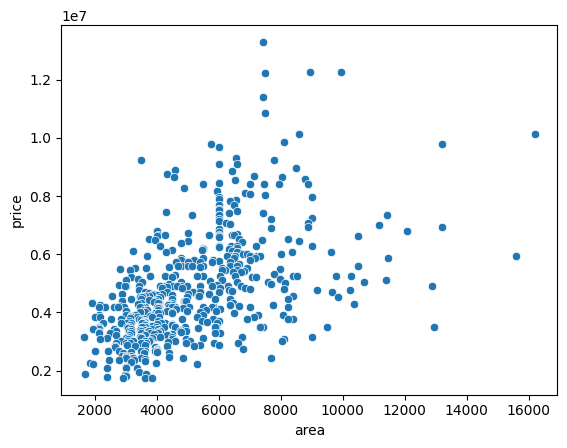

In [17]:
sns.scatterplot(x='area', y='price', data=df)

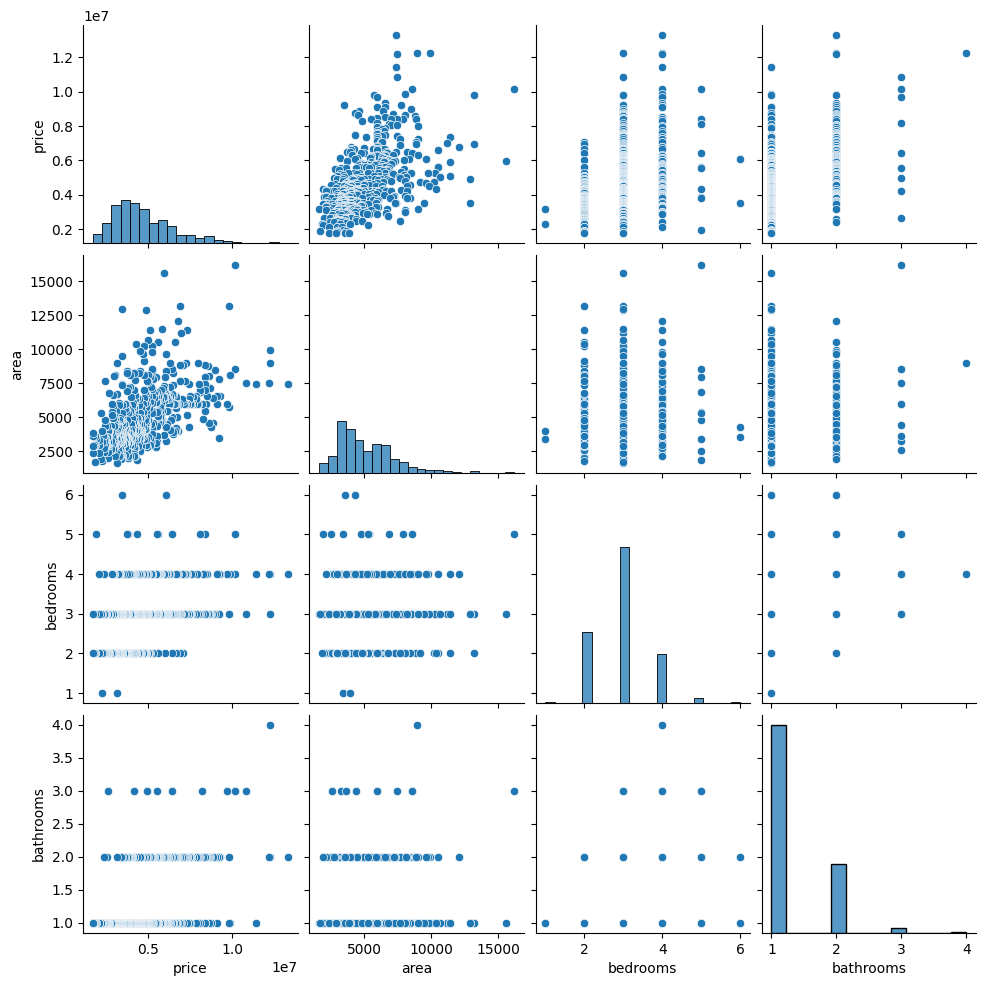

In [18]:
sns.pairplot(df[['price','area','bedrooms','bathrooms']])


Categorical vs Numerical:

Boxplots to compare numerical variable distributions across categories.

<Axes: xlabel='furnishingstatus', ylabel='price'>

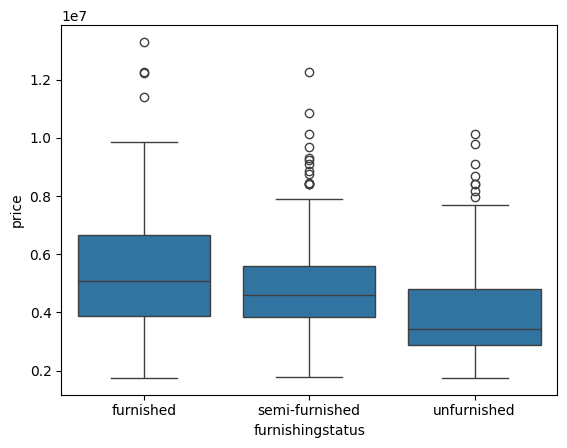

In [19]:
sns.boxplot(x='furnishingstatus', y='price', data=df)

<Axes: xlabel='mainroad', ylabel='price'>

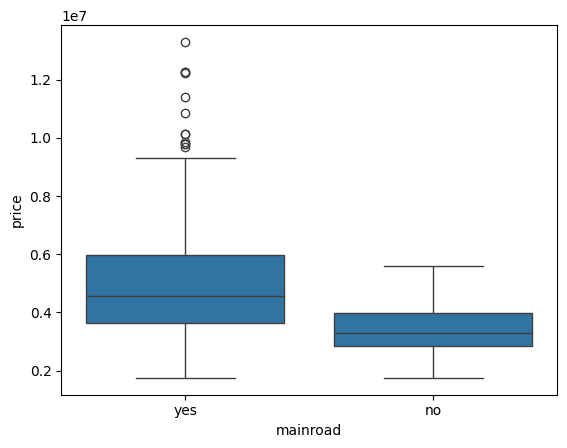

In [20]:
sns.boxplot(x='mainroad', y='price', data=df)

5. Multivariate Analysis

Correlation heatmaps: Check correlations among all numerical features.

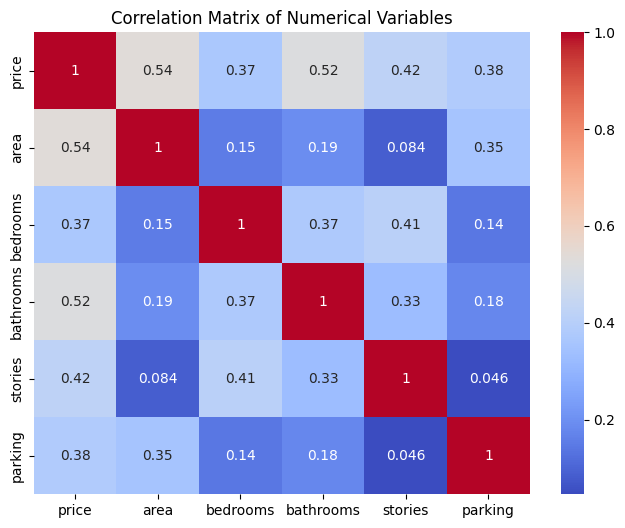

In [22]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
corr = df[numerical_cols].corr()


plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


2. Encode categorical variables for correlation (optional)

If you want to see correlations of categorical variables with price, you can convert 'yes'/'no' into 1/0 and also encode furnishingstatus numerically:

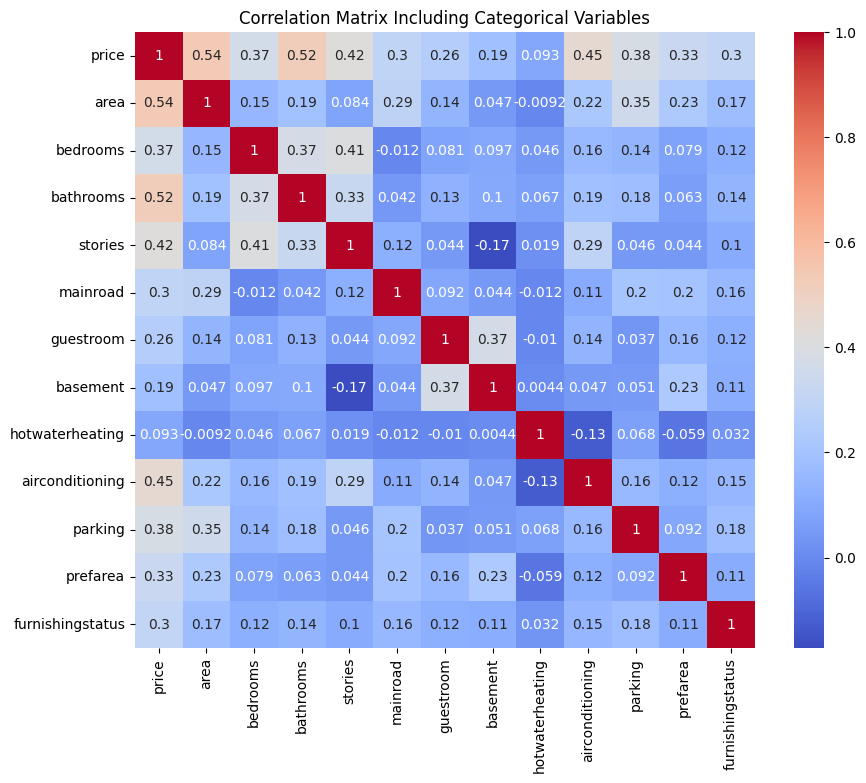

In [23]:
df_encoded = df.copy()

# Binary encoding
for col in ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']:
    df_encoded[col] = df_encoded[col].map({'yes':1, 'no':0})

# Ordinal encoding for furnishingstatus
furnishing_map = {'unfurnished':0, 'semi-furnished':1, 'furnished':2}
df_encoded['furnishingstatus'] = df_encoded['furnishingstatus'].map(furnishing_map)

# Now compute correlation
corr_encoded = df_encoded.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_encoded, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Including Categorical Variables')
plt.show()


Cross-tabulations / pivot tables for categorical variables:

In [24]:
pd.crosstab(df['mainroad'], df['furnishingstatus'])


furnishingstatus,furnished,semi-furnished,unfurnished
mainroad,,,
no,9,31,37
yes,131,196,141


Encoding is a way of transforming categorical or non-numeric data into numeric values so that machine learning models can process them. Most algorithms expect numbers, so encoding converts things like text labels or categories into a numeric representation. Let’s go through the main types and use cases.

1. Label Encoding

Assigns a unique integer to each category.

Example:

Color	Label
Red	0
Green	1
Blue	2

Pros: Simple, memory efficient.

Cons: Implicitly introduces ordinal relationship, which may confuse models that assume numeric order matters (like linear regression).

Best for: Ordinal data where order matters (low < medium < high).

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['furnishingstatus_encoded'] = le.fit_transform(df['furnishingstatus'])

2. One-Hot Encoding

Converts each category into a binary vector, with 1 indicating the presence of that category.

Example:

Color	Red	Green	Blue
Red	1	0	0
Green	0	1	0
Blue	0	0	1

Pros: Doesn’t assume any order; suitable for nominal data.

Cons: Can lead to high dimensionality if many categories.

Best for: Nominal categorical features (city, mainroad).

df_encoded = pd.get_dummies(df, columns=['mainroad','guestroom'], drop_first=True)

3. Ordinal Encoding

Assigns integer values based on order for ordinal data.

Example:

Size	Encoded
Small	0
Medium	1
Large	2

Pros: Preserves order.

Cons: Model may assume linear spacing; not suitable if spacing is unknown.

Best for: Ordered categories like education_level or furnishingstatus.

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']])
df['furnishingstatus_encoded'] = ord_enc.fit_transform(df[['furnishingstatus']])

4. Binary / Hash Encoding

Converts categories into binary representations or hashes.

Useful for high-cardinality categorical features (like thousands of unique city names).

Reduces dimensionality compared to one-hot encoding.

Examples: Hashing trick, category_encoders library in Python.

5. Frequency / Count Encoding

Replace each category with its frequency or count in the dataset.

Example:

City	Count
Delhi	50
Mumbai	30
Bangalore	40

Pros: Simple, captures popularity.

Cons: Loses semantic meaning, may not capture relationships.

Use case: Useful in tree-based models like XGBoost or LightGBM.

6. Target / Mean Encoding

Replace each category with the average of the target variable for that category.

Example for housing price:

Furnishing Status	Average Price
Unfurnished	3,500,000
Semi-Furnished	4,200,000
Furnished	5,000,000

Pros: Powerful for predictive tasks.

Cons: Risk of data leakage, needs proper cross-validation.

When to Use Which Encoding
| Encoding Type     | When to Use                                    |
| ----------------- | ---------------------------------------------- |
| Label             | Ordinal data, small number of categories       |
| One-Hot           | Nominal data, small-to-medium categories       |
| Ordinal           | Ordered categories                             |
| Binary / Hash     | High-cardinality categories                    |
| Frequency / Count | Tree-based models, high-cardinality            |
| Target / Mean     | Predictive modeling, regression/classification |


Encoding is essential for preparing categorical data for machine learning, and the choice of method depends on the type of data and the model you plan to use.



6. Feature Engineering (Optional but Common in Industry)

Create new features if needed:

total_rooms = bedrooms + bathrooms

age_of_house if construction year is available

Log-transform price if skewed

5.Feature Engineering

In [26]:
df['log_price'] = np.log(df['price'])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_price
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321036
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321036
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,14.414347
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,14.384879
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,14.375126
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,14.375126


In [27]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_price,total_rooms
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275,6
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321036,8
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321036,5
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175,6
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,14.414347,3
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,14.384879,4
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,14.375126,3
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,14.375126,4


In [28]:
df['price_per_sqft'] = df['price'] / df['area']
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_price,total_rooms,price_per_sqft
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275,6,1792.452830
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321036,8,1367.187500
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321036,5,1229.919679
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175,6,1628.666667
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001,5,1537.735849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,14.414347,3,606.666667
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,14.384879,4,736.312500
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,14.375126,3,483.425414
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,14.375126,4,601.374570
